<a href="https://colab.research.google.com/github/Davido-star/analyzing-flight-paths1/blob/main/flight_paths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
David Smith 
Python3
Analyzing flight Paths from a csv file 
"""


In [ ]:
# Upload local script to Colab here.
from google.colab import files
uploaded = files.upload()


Saving Camp_stats.csv to Camp_stats.csv


In [ ]:
#bring in the data from the csv
import csv
f=open("Camp_stats.csv")
for row in csv.reader(f):
    print(row)

['Refugee_Camp_Name', 'Country', 'Population_2006', 'Population_2014']
['Kakuma', 'Kenya', '90457', '153959']
['Hagadera', 'Kenya', '59185', '106968']
['Adjumani', 'Uganda', '54051', '96926']
['Dagahaley', 'Kenya', '39526', '88486']
['Zaatari', 'Jordan', '0', '84773']


In [ ]:
# Upload local script to Colab here.
from google.colab import files
uploaded = files.upload()

Saving airports.dat to airports.dat


In [5]:
#Challenge 1 Print names of every airport 
import csv
f = open("airports.dat")
for row in csv.reader(f):
    print(row[1])

Streaming output truncated to the last 5000 lines.
Guanare Airport
Higuerote Airport
Andrés Miguel Salazar Marcano Airport
Josefa Camejo International Airport
San Juan de Los Morros Airport
La Fria Airport
La Orchila Airport
La Chinita International Airport
Alberto Carnevalli Airport
Del Caribe Santiago Mariño International Airport
Simón Bolívar International Airport
Maturín Airport
Cacique Aramare Airport
General Bartolome Salom International Airport
Paramillo Airport
General Manuel Carlos Piar International Airport
Palmarito Airport
San Antonio Del Tachira Airport
Santa Bárbara de Barinas Airport
Santa Elena de Uairen Airport
Mayor Buenaventura Vivas International Airport
Sub Teniente Nestor Arias Airport
San Fernando De Apure Airport
San Tomé Airport
Santa Bárbara del Zulia Airport
Tucupita Airport
Tumeremo Airport
Arturo Michelena International Airport
Dr. Antonio Nicolás Briceño Airport
Valle de La Pascua Airport
Linden Airport
Lethem Airport
V.C. Bird International Airport
Sir Gr

In [32]:
#challenge 2 reading the airport database 
latitudes = {} #define new dictionarys for latitudes and longitudes 
longitudes = {}
#import database 
f = open("airports.dat")
for row in csv.reader(f):
  airport_id = row[0] #define the airport id for iteration
  latitudes[airport_id] = float(row[6])#latitudes in airports.dat are in row 6 
  longitudes[airport_id] = float(row[7])#longitudes in airports.dat are n row 

latitudes


{'1': -6.081689834590001,
 '2': -5.20707988739,
 '3': -5.826789855957031,
 '4': -6.569803,
 '5': -9.443380355834961,
 '6': -3.58383011818,
 '7': 61.1604995728,
 '8': 64.19090271,
 '9': 67.0122218992,
 '10': 76.5311965942,
 '11': 65.66000366210938,
 '12': 65.2833023071289,
 '13': 64.295601,
 '14': 65.952301,
 '15': 66.05809783935547,
 '16': 63.985000610352,
 '17': 65.555801,
 '18': 64.1299972534,
 '19': 66.133301,
 '20': 63.42430114746094,
 '21': 46.48500061035156,
 '22': 50.0564002991,
 '23': 44.639702,
 '24': 51.3918991089,
 '25': 49.079833,
 '26': 68.534401,
 '27': 49.13249969482422,
 '28': 48.33060073852539,
 '29': 64.29889678960001,
 '30': 49.950801849365234,
 '31': 49.91,
 '32': 69.1081008911,
 '33': 49.054970224899996,
 '34': 49.2963981628,
 '35': 47.007801,
 '36': 47.990799,
 '37': 67.816704,
 '38': 52.0750007629,
 '39': 49.1528015137,
 '40': 70.4860992432,
 '41': 64.1932983398,
 '42': 64.04309844970703,
 '43': 61.37110137939453,
 '44': 49.4681015015,
 '45': 49.21080017089844,
 

In [27]:
"""
Challenge 3 route distances 
"""
# Copy of geo_distance.py
# Using the Haversine formula for geographic Great Circle Distance
# As per https://en.wikipedia.org/wiki/Haversine_formula

from math import cos,radians,sin,pow,asin,sqrt

def distance(lat1, long1, lat2, long2):
  radius = 6371 # radius of the earth in km, roughly https://en.wikipedia.org/wiki/Earth_radius
  # Lat,long are in degrees but we need radians
  lat1 = radians(lat1)
  lat2 = radians(lat2)
  long1 = radians(long1)
  long2 = radians(long2)

  dlat = lat2-lat1
  dlon = long2-long1

  a = pow(sin(dlat/2),2) + cos(lat1)*cos(lat2)*pow(sin(dlon/2),2)
  distance = 2 * radius * asin(sqrt(a))

  return distance

In [30]:
# Upload local script to Colab here.
from google.colab import files
uploaded = files.upload()

Saving routes.dat to routes.dat


In [37]:
#import the routes.dat file 
import csv
distances=[] #define a list to hold our distances later on 
f = open("routes.dat")
for row in csv.reader(f):
  #define our source and destinations for distance calculations 
  source_airport= row[3]
  destination_airport=row[5]
  if source_airport in latitudes and destination_airport in latitudes: #some airports in the airports.dat file are not in the routes file and we want only the airports that are in the routes file to have calculations run 
    #define the source latitudes longitudes from the previously defined dictionary 
    source_latitudes=latitudes[source_airport]
    source_longitude=longitudes[source_airport]
    #define the destination latitudes longitudes from the previously defined dictionary 
    destination_latitudes=latitudes[destination_airport]
    destination_longitudes=longitudes[destination_airport]
    #appened the sources and destinations to our distances list 
    distances.append(distance(source_latitudes,source_longitude,destination_latitudes,destination_longitudes))
    
distances

[1506.825604458928,
 1040.4383197669074,
 448.164908709546,
 770.5085001497805,
 1338.6314665862067,
 715.6493504840489,
 892.3827877543458,
 951.4321982829719,
 1171.8814952837668,
 1008.2531100895807,
 1685.4265243719858,
 1171.8814952837668,
 1506.825604458928,
 1040.4383197669074,
 770.5085001497805,
 715.6493504840489,
 1008.2531100895807,
 1216.8445674824818,
 723.523203520023,
 1216.8445674824818,
 1372.8864143629512,
 1464.056935072568,
 448.164908709546,
 892.3827877543458,
 1685.4265243719858,
 1372.8864143629512,
 554.703359662419,
 1012.6027135761158,
 1557.1718220176435,
 1324.6117527543267,
 1338.6314665862067,
 1370.297258632382,
 723.523203520023,
 554.703359662419,
 1012.6027135761158,
 1324.6117527543267,
 1370.297258632382,
 951.4321982829719,
 1464.056935072568,
 1557.1718220176435,
 488.33962159397527,
 1199.3591559200308,
 1338.6314665862067,
 608.6430610264199,
 488.33962159397527,
 608.6430610264199,
 882.1865409507233,
 1458.824309959064,
 517.4862726798776,
 1

Text(0, 0.5, 'number of flights')

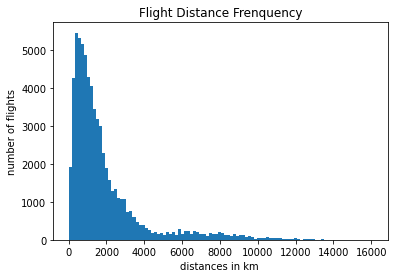

In [45]:
#functions to define and display a histogram 
import numpy as np
import matplotlib.pyplot as plt

plt.hist(distances,100) #we want to plot distances on the x axis and number of flights on the y 
#add graph label titles 
plt.title("Flight Distance Frenquency")
plt.xlabel("distances in km ")
plt.ylabel("number of flights")